In [1]:
import astropy.units as u
from astropy.units import Quantity
import numpy as np
import sys
sys.path.append('/Users/clairewilliams/opt/anaconda3/lib/python3.9/site-packages')
import pandas
import matplotlib.pyplot as plt
sys.path.append('/Users/clairewilliams/Research/Calculations/model-timescales/src')

from timescales.data import build_bulk_energy_grid
from timescales import TimescaleEnsemble
from timescales.profiles.power_law import PowerLawProfile

from timescales.physics.collisions import collision_timescale
from timescales.physics.relaxation import relaxation_timescale

from timescales.analysis.tables import structural_table, timescale_table
from timescales.analysis.recipes import generate_timescale_comparison,collision_vs_main_sequence, destructive_colllision_criterion


In [2]:
masses_array   = np.logspace(4, 8, 10) * u.Msun
radii_array    = np.logspace(-0.7, 2, 10) * u.pc
velocity_array = np.logspace(-0.7, 2.2, 10) * u.km/u.s

grid = build_bulk_energy_grid(masses_array, radii_array, velocity_array,
                              alpha=3/5, energy_unit=u.erg)


# Example: access aligned arrays
M = grid['M']   # Msun
R = grid['R']   # pc
V = grid['V']   # km/s
K = grid['K']   # erg
U = grid['U']   # erg

print(len(M), len(R), len(V), len(K), len(U))  # -> 1_000_000 each (100*100*100


167 167 167 167 167


In [8]:

model1 = TimescaleEnsemble(grid, profile_kwargs={"alpha":1.75},densityModel="power-law")

Using power-law model with properties:
alpha=1.75
No timescale arguments given. Defaulting to eccentricity 0, Mstar 1Msun.


In [9]:
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh", profile_kwargs={"alpha":1.75,'M_bh':1e6 *u.Msun})

Using power-law-bh model with properties:
alpha=1.75
M_bh=1000000.0 solMass
No timescale arguments given. Defaulting to eccentricity 0, Mstar 1Msun.


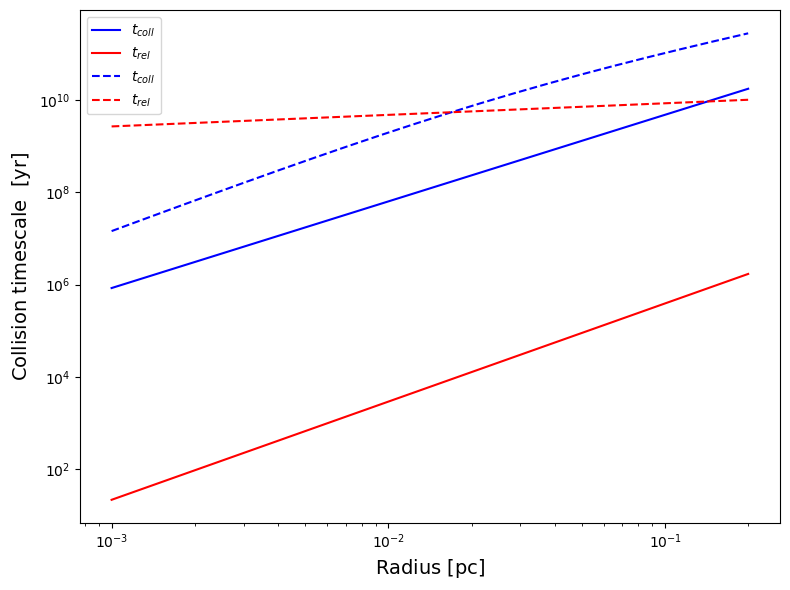

In [10]:
system_id = 0
t_coll = collision_timescale(model1.n[system_id], model1.sigma[system_id], model1.Mstar, e =0.999, alpha = 1.25).to('yr')

t_relax = relaxation_timescale(model1.sigma[system_id], model1.rho[system_id],model1.Mstar).to('yr')

fig, ax = plt.subplots(figsize=(8, 6))


ax.set_xscale('log')
ax.set_yscale('log')

xaxis = model1.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")
t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.999, alpha = 1.25).to('yr')

t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')
xaxis = modelbh.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue",linestyle = "dashed", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",linestyle = "dashed",label = r"$t_{rel}$")
ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"Collision timescale  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

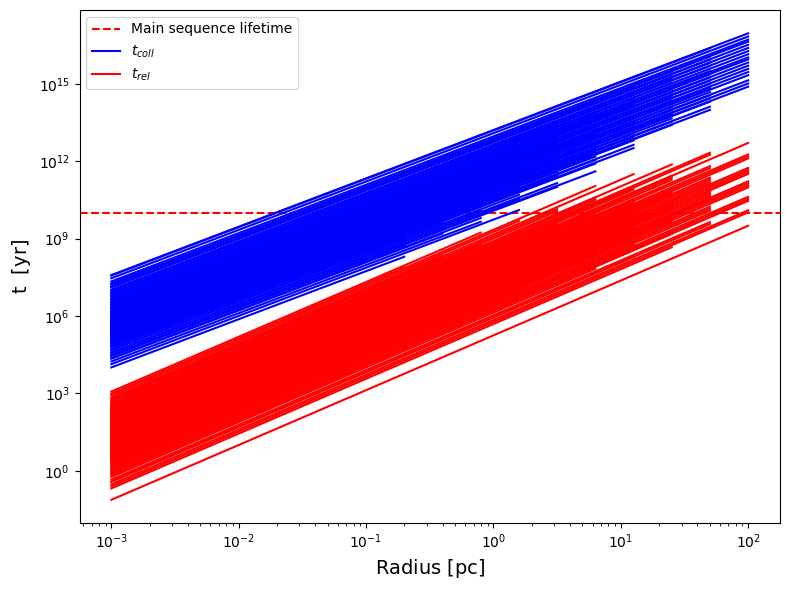

In [11]:

fig, ax = plt.subplots(figsize=(8, 6))
plt.axhline(y=1e10, color='r', linestyle='--', label='Main sequence lifetime')

ax.set_xscale('log')
ax.set_yscale('log')
system_id = 0
t_coll = collision_timescale(model1.n[system_id], model1.sigma[system_id], model1.Mstar, e =0.9, alpha = model1.alpha).to('yr')

t_relax = relaxation_timescale(model1.sigma[system_id], model1.rho[system_id],model1.Mstar).to('yr')

xaxis = model1.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")

for system_id in range(model1.Nsystems):
    t_coll = collision_timescale(model1.n[system_id], model1.sigma[system_id], model1.Mstar, e =0.9, alpha = model1.alpha).to('yr')

    t_relax = relaxation_timescale(model1.sigma[system_id], model1.rho[system_id],model1.Mstar).to('yr')

    xaxis = model1.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")


ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"t  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

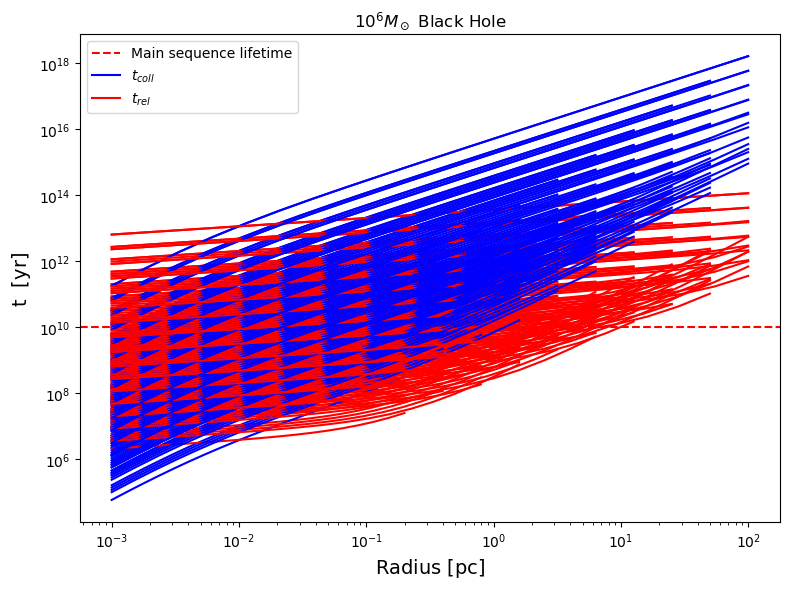

In [13]:

fig, ax = plt.subplots(figsize=(8, 6))
plt.axhline(y=1e10, color='r', linestyle='--', label='Main sequence lifetime')

ax.set_xscale('log')
ax.set_yscale('log')
system_id = 0
t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.0, alpha = modelbh.alpha).to('yr')

t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

xaxis = modelbh.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")

for system_id in range(modelbh.Nsystems):
    t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.0, alpha = modelbh.alpha).to('yr')

    t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

    xaxis = modelbh.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")


ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"t  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)
plt.title(r"$10^6 M_\odot$ Black Hole")
plt.legend()
plt.tight_layout()
plt.show()

Using power-law-bh model with properties:
alpha=1.75
M_bh=100000.0 solMass
No timescale arguments given. Defaulting to eccentricity 0, Mstar 1Msun.


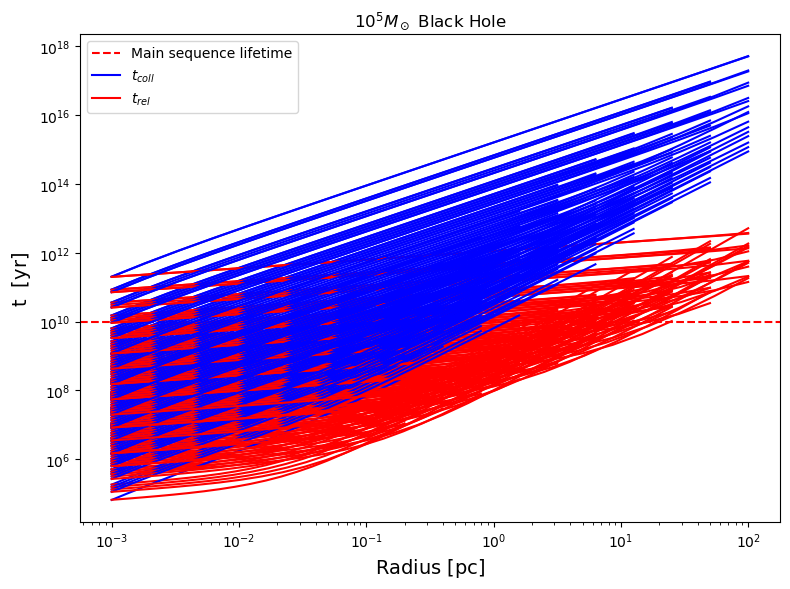

In [15]:
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh", profile_kwargs={"alpha":1.75,'M_bh':1e5 *u.Msun})
fig, ax = plt.subplots(figsize=(8, 6))
plt.axhline(y=1e10, color='r', linestyle='--', label='Main sequence lifetime')

ax.set_xscale('log')
ax.set_yscale('log')
system_id = 0
t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.0, alpha = modelbh.alpha).to('yr')

t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

xaxis = modelbh.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")

for system_id in range(modelbh.Nsystems):
    t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.0, alpha = modelbh.alpha).to('yr')

    t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

    xaxis = modelbh.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")


ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"t  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)
plt.title(r"$10^5 M_\odot$ Black Hole")

plt.legend()
plt.tight_layout()
plt.show()

Using power-law-bh model with properties:
alpha=1.75
M_bh=10000.0 solMass
No timescale arguments given. Defaulting to eccentricity 0, Mstar 1Msun.


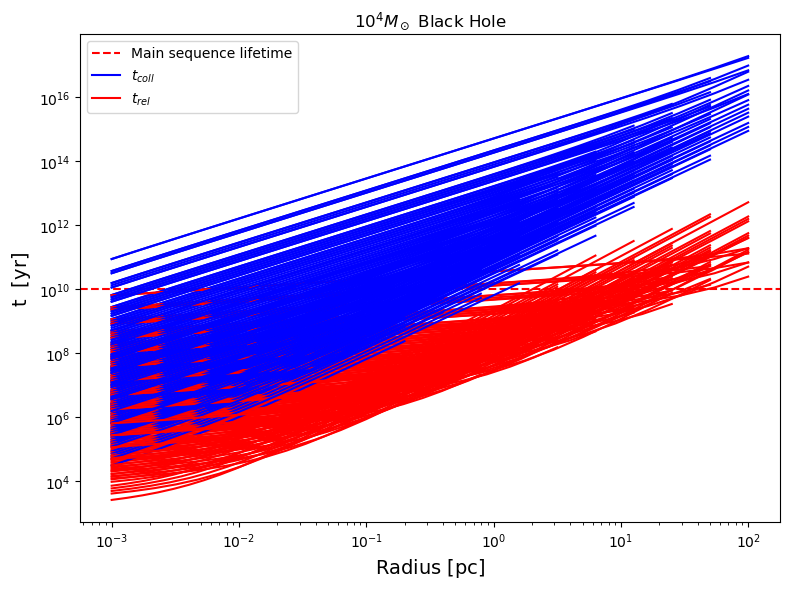

In [17]:
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh", profile_kwargs={"alpha":1.75,'M_bh':1e4 *u.Msun})
fig, ax = plt.subplots(figsize=(8, 6))
plt.axhline(y=1e10, color='r', linestyle='--', label='Main sequence lifetime')

ax.set_xscale('log')
ax.set_yscale('log')
system_id = 0
t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.9, alpha = modelbh.alpha).to('yr')

t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

xaxis = modelbh.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")

for system_id in range(modelbh.Nsystems):
    t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.0, alpha = modelbh.alpha).to('yr')

    t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

    xaxis = modelbh.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")


ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"t  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)
plt.title(r"$10^4 M_\odot$ Black Hole")

plt.legend()
plt.tight_layout()
plt.show()

Using power-law-bh model with properties:
alpha=1.75
M_bh=1000.0 solMass
No timescale arguments given. Defaulting to eccentricity 0, Mstar 1Msun.


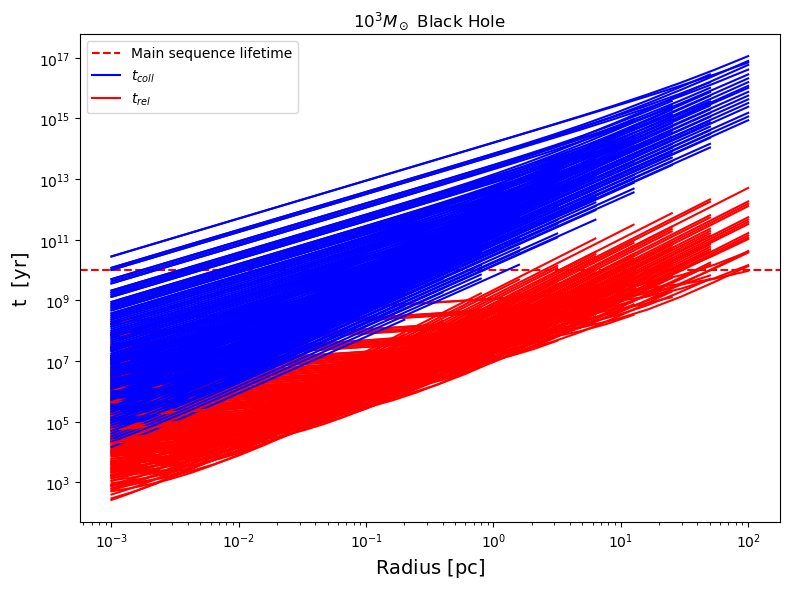

In [19]:
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh", profile_kwargs={"alpha":1.75,'M_bh':1e3 *u.Msun})
fig, ax = plt.subplots(figsize=(8, 6))
plt.axhline(y=1e10, color='r', linestyle='--', label='Main sequence lifetime')

ax.set_xscale('log')
ax.set_yscale('log')
system_id = 0
t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.0, alpha = modelbh.alpha).to('yr')

t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

xaxis = modelbh.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")

for system_id in range(modelbh.Nsystems):
    t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.0, alpha = modelbh.alpha).to('yr')

    t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

    xaxis = modelbh.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")


ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"t  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)
plt.title(r"$10^3 M_\odot$ Black Hole")

plt.legend()
plt.tight_layout()
plt.show()

Using power-law-bh model with properties:
alpha=1.75
M_bh=100.0 solMass
No timescale arguments given. Defaulting to eccentricity 0, Mstar 1Msun.


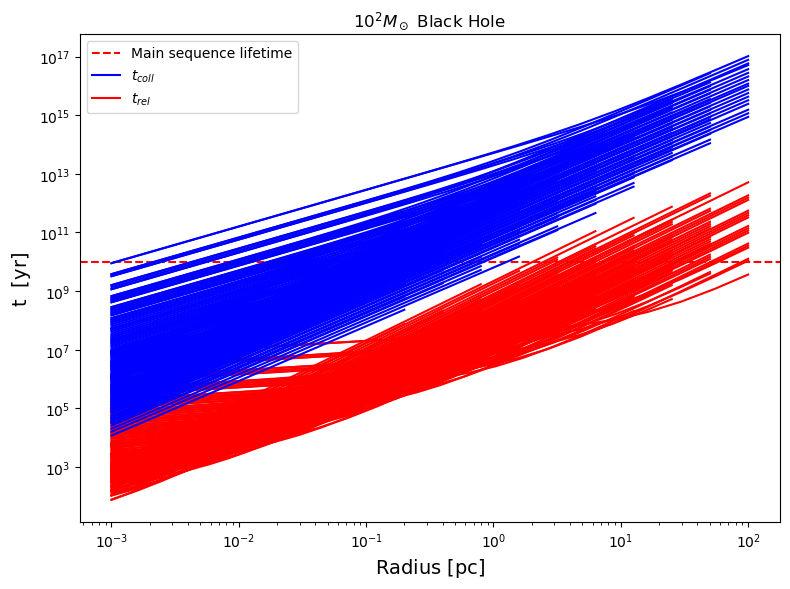

In [22]:
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh", profile_kwargs={"alpha":1.75,'M_bh':1e2 *u.Msun})
fig, ax = plt.subplots(figsize=(8, 6))
plt.axhline(y=1e10, color='r', linestyle='--', label='Main sequence lifetime')

ax.set_xscale('log')
ax.set_yscale('log')
system_id = 0
t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.0, alpha = modelbh.alpha).to('yr')

t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

xaxis = modelbh.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")

for system_id in range(modelbh.Nsystems):
    t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.0, alpha = modelbh.alpha).to('yr')

    t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

    xaxis = modelbh.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")


ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"t  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)
plt.title(r"$10^2 M_\odot$ Black Hole")

plt.legend()
plt.tight_layout()
plt.show()

In [23]:
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh",Nsampling=50, profile_kwargs={"alpha":1.75,'M_bh':1e6 *u.Msun})
table5 = generate_timescale_comparison(modelbh, as_ = 'pandas')


Using power-law-bh model with properties:
alpha=1.75
M_bh=1000000.0 solMass
No timescale arguments given. Defaulting to eccentricity 0, Mstar 1Msun.
will use defaults for  {'Mcollisions': <Quantity 1. solMass>, 'n_unit': <Quantity 1. 1 / cm3>, 'v_unit': Unit("cm / s"), 'Mstar_unit': Unit("solMass")}
Selected coulomb function based on BH or not.
will use defaults for  {'v_unit': Unit("km / s"), 'rho_unit': Unit("g / cm3"), 'mass_unit': Unit("solMass")}


In [24]:
table5

,system_id,r,t_coll,t_relax,sigma/vesc,massloss,t_relax/t_coll,t_ms/t_relax,t_ms/t_coll,shortest,t_ms
0,0,0.001 pc,74178469.01851138 yr,2650015641.64644 yr,2.024674795103316,1.0,35.72486297857028,3.773562632176411,134.81000797555527,t_coll,10000000000.0 yr
1,0,0.0011141374574404601 pc,92528697.04013203 yr,2722597982.5283766 yr,1.9181652446171322,1.0,29.424363139443294,3.6729623926017045,108.07457923743104,t_coll,10000000000.0 yr
2,0,0.0012413022740718933 pc,115192065.27539256 yr,2797168670.9200015 yr,1.8172587877805868,1.0,24.28265058216241,3.575043616054428,86.81153494464006,t_coll,10000000000.0 yr
3,0,0.001382981359549522 pc,143107920.04238045 yr,2873782239.826652 yr,1.7216606720962442,1.0,20.081224288464263,3.4797347764955235,69.87733451117568,t_coll,10000000000.0 yr
4,0,0.0015408313356160552 pc,177397692.57577407 yr,2952494729.0618906 yr,1.6310916511710212,1.0,16.643366022366695,3.386966249784752,56.37051900057029,t_coll,10000000000.0 yr
...,...,...,...,...,...,...,...,...,...,...,...
8345,166,39.06939937054621 pc,157768944636282.9 yr,291018802612.5297 yr,0.03283532998936998,0.0,0.0018445886374117424,0.034362040906732304,6.33838302148359e-05,t_ms,10000000000.0 yr
8346,166,49.417133613238384 pc,242039494179983.94 yr,461764324555.6602 yr,0.033392634566850904,0.0,0.0019078056914640792,0.02165606883906125,4.131557138589895e-05,t_ms,10000000000.0 yr
8347,166,62.50551925273976 pc,372428239354232.75 yr,739273736947.4741 yr,0.03406082599650352,0.0,0.0019850098860100633,0.013526789198938507,2.6850810285867082e-05,t_ms,10000000000.0 yr
8348,166,79.06043210907701 pc,574380416816694.2 yr,1191795621126.7537 yr,0.03482278771275593,0.0,0.002074923841818756,0.008390700404273803,1.741006431838599e-05,t_ms,10000000000.0 yr


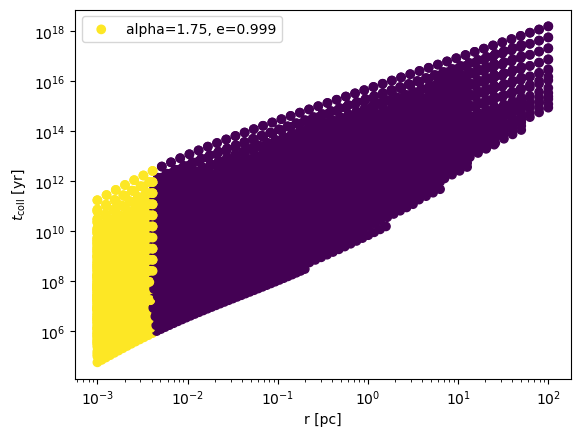

In [25]:
# from astropy import units as u

r = u.Quantity(table5['r']).to_value(u.pc)      # plain floats in chosen units
t = u.Quantity(table5['t_coll']).to_value(u.yr)
c = table5['massloss']
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
ax.scatter(r, t,c = c, label="alpha=1.75, e=0.999")
ax.set_xlabel("r [pc]")
ax.set_ylabel(r"$t_{\mathrm{coll}}$ [yr]")
ax.legend()

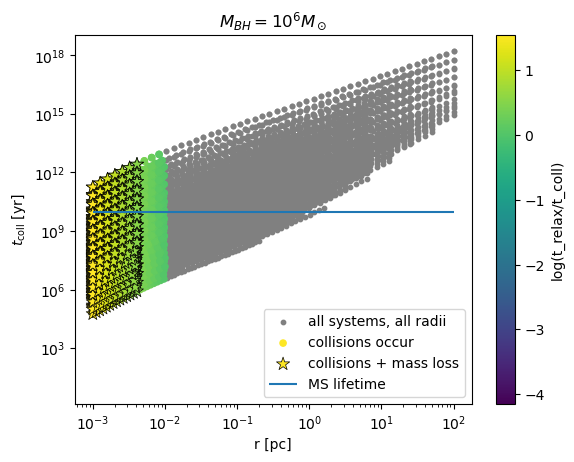

In [26]:
# from astropy import units as u

r = u.Quantity(table5['r']).to_value(u.pc)      # plain floats in chosen units
t = u.Quantity(table5['t_coll']).to_value(u.yr)
c = np.log10(np.array(u.Quantity(table5['t_relax/t_coll']).value))
ml = np.array(u.Quantity(table5['massloss']).value)
vmin =min(c)
vmax = max(c)
nocolidx = np.where(c<0,True,False)
yescolidx = np.logical_not(nocolidx)
masslossidx = np.where(ml[yescolidx]==1,True,False)
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", s=10,label="all systems, all radii")

im = ax.scatter(r[yescolidx], t[yescolidx],c = c[yescolidx],vmin= vmin,vmax = vmax,s=20, label="collisions occur")
im = ax.scatter(r[yescolidx][masslossidx], t[yescolidx][masslossidx],
            marker = "*",c = c[yescolidx][masslossidx],edgecolor = "black",
            linewidth = 0.5,vmin= vmin,vmax = vmax,s=100, label="collisions + mass loss")

plt.colorbar(im,label='log(t_relax/t_coll)', orientation='vertical')
# im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", label="alpha=1.75, e=0.999")
ax.hlines(1e10,xmin=1e-3,xmax=1e2, label= "MS lifetime")
ax.set_xlabel("r [pc]")
ax.set_ylabel(r"$t_{\mathrm{coll}}$ [yr]")
plt.title(r"$M_{BH}=10^6 M_\odot$")
ax.legend()
plt.show()

Using power-law-bh model with properties:
alpha=1.75
M_bh=316227.7660168379 solMass
No timescale arguments given. Defaulting to eccentricity 0, Mstar 1Msun.
will use defaults for  {'Mcollisions': <Quantity 1. solMass>, 'n_unit': <Quantity 1. 1 / cm3>, 'v_unit': Unit("cm / s"), 'Mstar_unit': Unit("solMass")}
Selected coulomb function based on BH or not.
will use defaults for  {'v_unit': Unit("km / s"), 'rho_unit': Unit("g / cm3"), 'mass_unit': Unit("solMass")}


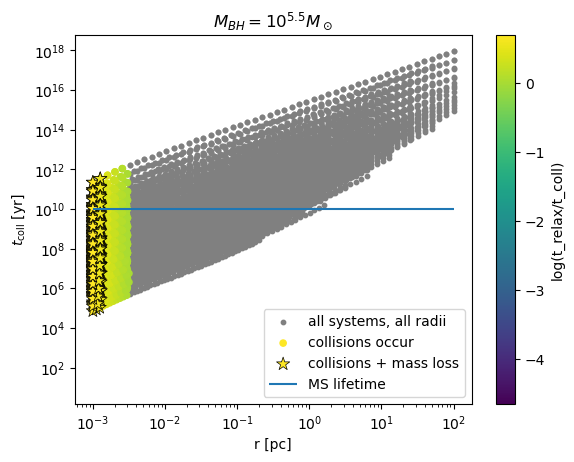

In [29]:
# from astropy import units as u
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh",Nsampling=50, profile_kwargs={"alpha":1.75,'M_bh':10**5.5 *u.Msun})
table5 = generate_timescale_comparison(modelbh, as_ = 'pandas')

r = u.Quantity(table5['r']).to_value(u.pc)      # plain floats in chosen units
t = u.Quantity(table5['t_coll']).to_value(u.yr)
c = np.log10(np.array(u.Quantity(table5['t_relax/t_coll']).value))
ml = np.array(u.Quantity(table5['massloss']).value)
vmin =min(c)
vmax = max(c)
nocolidx = np.where(c<0,True,False)
yescolidx = np.logical_not(nocolidx)
masslossidx = np.where(ml[yescolidx]==1,True,False)
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", s=10,label="all systems, all radii")

im = ax.scatter(r[yescolidx], t[yescolidx],c = c[yescolidx],vmin= vmin,vmax = vmax,s=20, label="collisions occur")
im = ax.scatter(r[yescolidx][masslossidx], t[yescolidx][masslossidx],
            marker = "*",c = c[yescolidx][masslossidx],edgecolor = "black",
            linewidth = 0.5,vmin= vmin,vmax = vmax,s=100, label="collisions + mass loss")

plt.colorbar(im,label='log(t_relax/t_coll)', orientation='vertical')
# im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", label="alpha=1.75, e=0.999")
ax.hlines(1e10,xmin=1e-3,xmax=1e2, label= "MS lifetime")
ax.set_xlabel("r [pc]")
ax.set_ylabel(r"$t_{\mathrm{coll}}$ [yr]")
plt.title(r"$M_{BH}=10^{5.5} M_\odot$")
ax.legend()

Using power-law-bh model with properties:
alpha=1.75
M_bh=100000.0 solMass
No timescale arguments given. Defaulting to eccentricity 0, Mstar 1Msun.
will use defaults for  {'Mcollisions': <Quantity 1. solMass>, 'n_unit': <Quantity 1. 1 / cm3>, 'v_unit': Unit("cm / s"), 'Mstar_unit': Unit("solMass")}
Selected coulomb function based on BH or not.
will use defaults for  {'v_unit': Unit("km / s"), 'rho_unit': Unit("g / cm3"), 'mass_unit': Unit("solMass")}


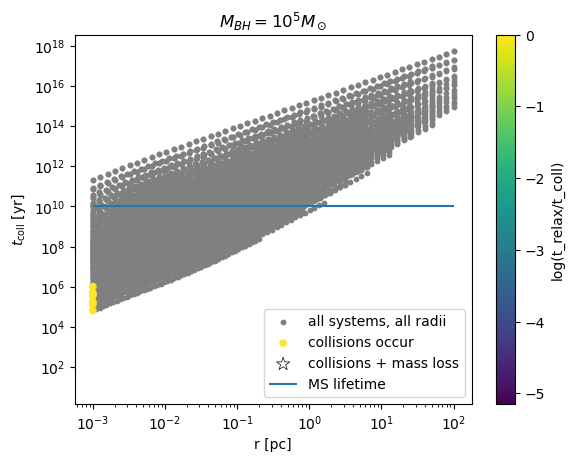

In [30]:
# from astropy import units as u
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh",Nsampling=50, profile_kwargs={"alpha":1.75,'M_bh':1e5 *u.Msun})
table5 = generate_timescale_comparison(modelbh, as_ = 'pandas')

r = u.Quantity(table5['r']).to_value(u.pc)      # plain floats in chosen units
t = u.Quantity(table5['t_coll']).to_value(u.yr)
c = np.log10(np.array(u.Quantity(table5['t_relax/t_coll']).value))
ml = np.array(u.Quantity(table5['massloss']).value)
vmin =min(c)
vmax = max(c)
nocolidx = np.where(c<0,True,False)
yescolidx = np.logical_not(nocolidx)
masslossidx = np.where(ml[yescolidx]==1,True,False)
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", s=10,label="all systems, all radii")

im = ax.scatter(r[yescolidx], t[yescolidx],c = c[yescolidx],vmin= vmin,vmax = vmax,s=20, label="collisions occur")
im = ax.scatter(r[yescolidx][masslossidx], t[yescolidx][masslossidx],
            marker = "*",c = c[yescolidx][masslossidx],edgecolor = "black",
            linewidth = 0.5,vmin= vmin,vmax = vmax,s=100, label="collisions + mass loss")

plt.colorbar(im,label='log(t_relax/t_coll)', orientation='vertical')
# im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", label="alpha=1.75, e=0.999")
ax.hlines(1e10,xmin=1e-3,xmax=1e2, label= "MS lifetime")
ax.set_xlabel("r [pc]")
ax.set_ylabel(r"$t_{\mathrm{coll}}$ [yr]")
plt.title(r"$M_{BH}=10^5 M_\odot$")
ax.legend()

Using power-law-bh model with properties:
alpha=1.75
M_bh=97723.72209558112 solMass
No timescale arguments given. Defaulting to eccentricity 0, Mstar 1Msun.
will use defaults for  {'Mcollisions': <Quantity 1. solMass>, 'n_unit': <Quantity 1. 1 / cm3>, 'v_unit': Unit("cm / s"), 'Mstar_unit': Unit("solMass")}
Selected coulomb function based on BH or not.
will use defaults for  {'v_unit': Unit("km / s"), 'rho_unit': Unit("g / cm3"), 'mass_unit': Unit("solMass")}


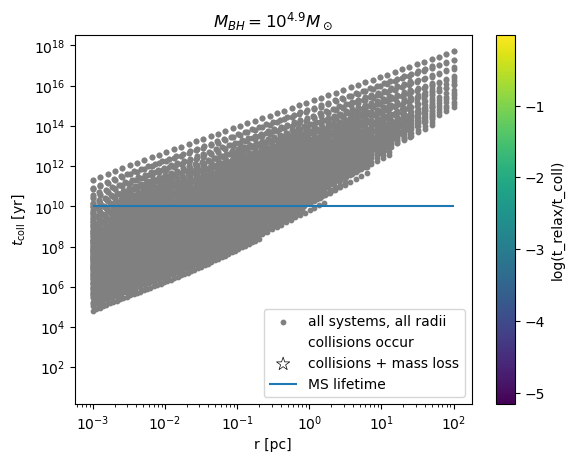

In [31]:
# from astropy import units as u
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh",Nsampling=50, profile_kwargs={"alpha":1.75,'M_bh':10**4.99 *u.Msun})
table5 = generate_timescale_comparison(modelbh, as_ = 'pandas')

r = u.Quantity(table5['r']).to_value(u.pc)      # plain floats in chosen units
t = u.Quantity(table5['t_coll']).to_value(u.yr)
c = np.log10(np.array(u.Quantity(table5['t_relax/t_coll']).value))
ml = np.array(u.Quantity(table5['massloss']).value)
vmin =min(c)
vmax = max(c)
nocolidx = np.where(c<0,True,False)
yescolidx = np.logical_not(nocolidx)
masslossidx = np.where(ml[yescolidx]==1,True,False)
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", s=10,label="all systems, all radii")

im = ax.scatter(r[yescolidx], t[yescolidx],c = c[yescolidx],vmin= vmin,vmax = vmax,s=20, label="collisions occur")
im = ax.scatter(r[yescolidx][masslossidx], t[yescolidx][masslossidx],
            marker = "*",c = c[yescolidx][masslossidx],edgecolor = "black",
            linewidth = 0.5,vmin= vmin,vmax = vmax,s=100, label="collisions + mass loss")

plt.colorbar(im,label='log(t_relax/t_coll)', orientation='vertical')
# im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", label="alpha=1.75, e=0.999")
ax.hlines(1e10,xmin=1e-3,xmax=1e2, label= "MS lifetime")
ax.set_xlabel("r [pc]")
ax.set_ylabel(r"$t_{\mathrm{coll}}$ [yr]")
plt.title(r"$M_{BH}=10^{4.9} M_\odot$")
ax.legend()

Using power-law-bh model with properties:
alpha=1.75
M_bh=10000.0 solMass
No timescale arguments given. Defaulting to eccentricity 0, Mstar 1Msun.
will use defaults for  {'Mcollisions': <Quantity 1. solMass>, 'n_unit': <Quantity 1. 1 / cm3>, 'v_unit': Unit("cm / s"), 'Mstar_unit': Unit("solMass")}
Selected coulomb function based on BH or not.
will use defaults for  {'v_unit': Unit("km / s"), 'rho_unit': Unit("g / cm3"), 'mass_unit': Unit("solMass")}


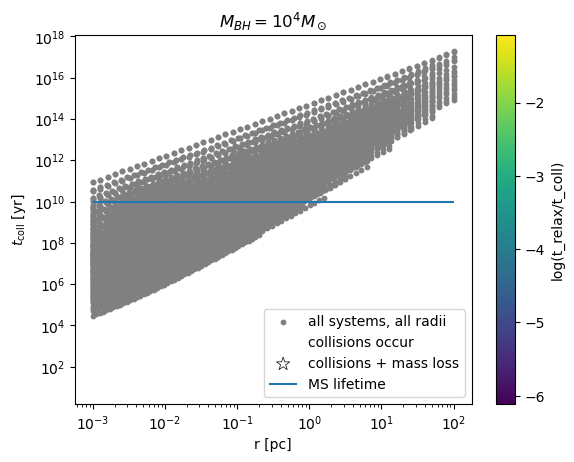

In [32]:
# from astropy import units as u
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh",Nsampling=50, profile_kwargs={"alpha":1.75,'M_bh':1e4 *u.Msun})
table5 = generate_timescale_comparison(modelbh, as_ = 'pandas')

r = u.Quantity(table5['r']).to_value(u.pc)      # plain floats in chosen units
t = u.Quantity(table5['t_coll']).to_value(u.yr)
c = np.log10(np.array(u.Quantity(table5['t_relax/t_coll']).value))
ml = np.array(u.Quantity(table5['massloss']).value)
vmin =min(c)
vmax = max(c)
nocolidx = np.where(c<0,True,False)
yescolidx = np.logical_not(nocolidx)
masslossidx = np.where(ml[yescolidx]==1,True,False)
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", s=10,label="all systems, all radii")

im = ax.scatter(r[yescolidx], t[yescolidx],c = c[yescolidx],vmin= vmin,vmax = vmax,s=20, label="collisions occur")
im = ax.scatter(r[yescolidx][masslossidx], t[yescolidx][masslossidx],
            marker = "*",c = c[yescolidx][masslossidx],edgecolor = "black",
            linewidth = 0.5,vmin= vmin,vmax = vmax,s=100, label="collisions + mass loss")

plt.colorbar(im,label='log(t_relax/t_coll)', orientation='vertical')
# im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", label="alpha=1.75, e=0.999")
ax.hlines(1e10,xmin=1e-3,xmax=1e2, label= "MS lifetime")
ax.set_xlabel("r [pc]")
ax.set_ylabel(r"$t_{\mathrm{coll}}$ [yr]")
plt.title(r"$M_{BH}=10^4 M_\odot$")
ax.legend()

Using power-law-bh model with properties:
alpha=1.75
M_bh=1000000.0 solMass
Using parameters for timescale evaluation
Mcollisions=10.0 solMass
Mstar=10.0 solMass
will use defaults for  {'e': 0.0, 'n_unit': <Quantity 1. 1 / cm3>, 'v_unit': Unit("cm / s"), 'Mstar_unit': Unit("solMass")}
Selected coulomb function based on BH or not.
will use defaults for  {'v_unit': Unit("km / s"), 'rho_unit': Unit("g / cm3"), 'mass_unit': Unit("solMass")}


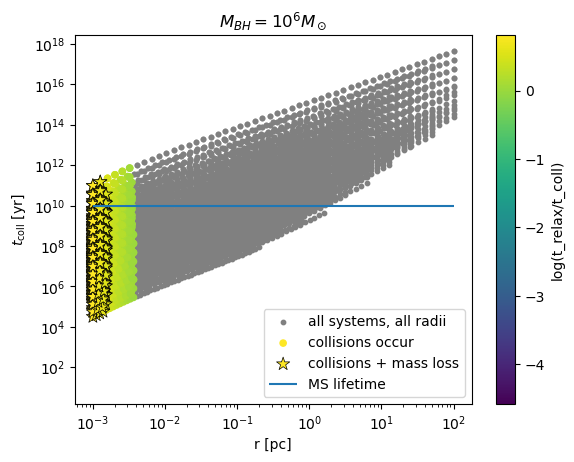

In [36]:
# from astropy import units as u
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh",
                                    Nsampling=50, 
                                    profile_kwargs={"alpha":1.75,'M_bh':10**6 *u.Msun},
                                    timescales_kwargs= {'Mcollisions': 10 * u.Msun,'Mstar' :10*u.Msun, })
table5 = generate_timescale_comparison(modelbh, as_ = 'pandas')

r = u.Quantity(table5['r']).to_value(u.pc)      # plain floats in chosen units
t = u.Quantity(table5['t_coll']).to_value(u.yr)
c = np.log10(np.array(u.Quantity(table5['t_relax/t_coll']).value))
ml = np.array(u.Quantity(table5['massloss']).value)
vmin =min(c)
vmax = max(c)
nocolidx = np.where(c<0,True,False)
yescolidx = np.logical_not(nocolidx)
masslossidx = np.where(ml[yescolidx]==1,True,False)
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", s=10,label="all systems, all radii")

im = ax.scatter(r[yescolidx], t[yescolidx],c = c[yescolidx],vmin= vmin,vmax = vmax,s=20, label="collisions occur")
im = ax.scatter(r[yescolidx][masslossidx], t[yescolidx][masslossidx],
            marker = "*",c = c[yescolidx][masslossidx],edgecolor = "black",
            linewidth = 0.5,vmin= vmin,vmax = vmax,s=100, label="collisions + mass loss")

plt.colorbar(im,label='log(t_relax/t_coll)', orientation='vertical')
# im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", label="alpha=1.75, e=0.999")
ax.hlines(1e10,xmin=1e-3,xmax=1e2, label= "MS lifetime")
ax.set_xlabel("r [pc]")
ax.set_ylabel(r"$t_{\mathrm{coll}}$ [yr]")
plt.title(r"$M_{BH}=10^{6} M_\odot$")
ax.legend()

In [39]:


def plot_bulk_colored_by_metric(
    table,
    ensemble,
    *,
    # bulk axes to plot (keys into ensemble.grid)
    x_key="M",                          # e.g., "M", "R", "V" in your grid
    y_key="R",
    x_unit=u.Msun,
    y_unit=u.pc,
    # which per-system color metric to compute
    metric="any_tcoll_lt_trelax",       # options below; or pass a callable(df_sys)->value
    threshold=None,                     # Quantity for thresholded metrics (e.g., 1e10*u.yr)
    # column names in the timescale table
    system_col="system_id",
    r_col="r",
    tcoll_col="t_coll",
    trelax_col="t_relax",
    t_ms_col = "t_ms",
    # plotting
    cmap="viridis",
    ax=None,
):
    """
    Scatter plot of bulk parameters (x_key vs y_key), one point per system,
    colored by a per-system metric computed from the timescale table.

    Parameters
    ----------
    table : dict or pandas.DataFrame
        Must have columns: system_id, r, t_coll (and usually t_relax).
        Values should be astropy Quantities (or lists thereof).
    ensemble : TimescaleEnsemble
        Used to fetch bulk x/y from ensemble.grid[x_key]/[y_key].
        Assumes system_id maps to index 0..N-1 matching ensemble order.
    x_key, y_key : str
        Keys into ensemble.grid for bulk parameters (e.g., "M", "R", "V").
    x_unit, y_unit : Unit
        Display units for axes.
    metric : str or callable
        One of:
          - "any_tcoll_lt_trelax": 1 if any row has t_coll < t_relax else 0
          - "fraction_tcoll_lt_trelax": fraction of rows with t_coll < t_relax
          - "min_ratio_tcoll_trelax": min over rows of (t_coll / t_relax)
          - "count_tcoll_lt": number of rows with t_coll < threshold (needs `threshold`)
        Or a callable: f(df_sys) -> float (df_sys is the per-system subset).
    threshold : Quantity
        Required for "count_tcoll_lt" (e.g., 1e10*u.yr)
    system_col, r_col, tcoll_col, trelax_col : str
        Column names in your table.
    cmap : str
        Matplotlib colormap for continuous metrics.
    ax : matplotlib.axes.Axes
        Axis to plot on; if None, a new fig/ax is created.

    Returns
    -------
    fig, ax
    """
    # --- normalize to a pandas DataFrame for easy grouping ---
    try:
        import pandas as pd
        if isinstance(table, dict):
            df = pd.DataFrame(table)
        else:
            df = table
    except Exception as e:
        raise ImportError("This function requires pandas for grouping. "
                          "Install with `pip install pandas`.") from e

    # --- ensure quantities are Quantities (not strings) ---
    # If the table was produced by our earlier helpers, columns are already Quantities.
    # If not, you may need to wrap/conform here.

    # --- build per-system metric ---
    systems = sorted(df[system_col].unique().tolist())
    vals = []
    for sid in systems:
        df_sys = df[df[system_col] == sid]

        # Convert the relevant timescales to common units for numeric comparisons
        t_coll = u.Quantity(df_sys[tcoll_col].to_list())
        if metric in ("any_tcoll_lt_trelax", "fraction_tcoll_lt_trelax", "min_ratio_tcoll_trelax"):
            t_relax = u.Quantity(df_sys[trelax_col].to_list())
        if metric in ("any_tcoll_lt_tms"):
            t_ms =u.Quantity(df_sys[t_ms_col].to_list())
        if callable(metric):
            val = metric(df_sys)  # user-defined callable returns numeric
        elif metric == "any_tcoll_lt_trelax":
            mask = (t_coll < t_relax)
            val = float(np.any(mask))
        elif metric == "any_tcoll_lt_tms":
            mask = (t_coll < t_ms)
            val = float(np.any(mask))
        elif metric == "fraction_tcoll_lt_trelax":
            mask = (t_coll < t_relax)
            val = float(np.mean(mask))
        elif metric == "min_ratio_tcoll_trelax":
            ratio = (t_coll / t_relax).to_value(u.one)
            val = float(np.nanmin(ratio))
        elif metric == "count_tcoll_lt":
            if threshold is None:
                raise ValueError("`threshold` (Quantity) is required for metric='count_tcoll_lt'.")
            val = int(np.sum(t_coll < threshold))
        else:
            raise ValueError(f"Unknown metric '{metric}'.")

        vals.append(val)

    vals = np.array(vals, dtype=float)

    # --- gather bulk x/y from ensemble.grid, convert to units, align with system order ---
    try:
        if x_key == "U/K":
            U = u.Quantity(ensemble.grid["U"]).to(u.erg)
            K = u.Quantity(ensemble.grid["K"]).to(u.erg)
            x_bulk = -U/K
            y_bulk = u.Quantity(ensemble.grid[y_key]).to(y_unit)
        else: 
            x_bulk = u.Quantity(ensemble.grid[x_key]).to(x_unit)
            y_bulk = u.Quantity(ensemble.grid[y_key]).to(y_unit)
    except Exception as e:
        raise KeyError(f"Could not read '{x_key}'/'{y_key}' from ensemble.grid.") from e

    # sanity check
    if len(x_bulk) != len(systems) or len(y_bulk) != len(systems):
        # Assume systems are 0..N-1 and map directly; otherwise you can
        # remap by index if your system ids are not contiguous
        pass

    # --- choose coloring strategy ---
    # If the metric is strictly binary (0/1), use a discrete cmap and labeled colorbar.
    is_binary = np.all(np.isin(vals, [0.0, 1.0]))

    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure

    if is_binary:
        from matplotlib.colors import ListedColormap, BoundaryNorm
        cmap_bin = ListedColormap(["#d62728", "#2ca02c"])  # red=no, green=yes
        bounds = [-0.5, 0.5, 1.5]
        norm = BoundaryNorm(bounds, cmap_bin.N)
        sc = ax.scatter(x_bulk.to_value(x_unit), y_bulk.to_value(y_unit),
                        c=vals, cmap=cmap_bin, norm=norm, s=50, edgecolor="k")
        cbar = fig.colorbar(sc, ax=ax, ticks=[0, 1])
        cbar.ax.set_yticklabels(["No", "Yes"])
        cbar.set_label(metric)
    else:
        sc = ax.scatter(x_bulk.to_value(x_unit), y_bulk.to_value(y_unit),
                        c=vals, cmap=cmap, s=50, edgecolor="k")
        cbar = fig.colorbar(sc, ax=ax)
        cbar.set_label(metric)

    ax.set_xlabel(f"{x_key} [{x_unit}]")
    ax.set_ylabel(f"{y_key} [{y_unit}]")
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.grid(True, ls=":", alpha=0.6)

    return fig, ax


In [37]:
# modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh",Nsampling=50, profile_kwargs={'M_bh':10**4.99 *u.Msun})
table5 = generate_timescale_comparison(modelbh, as_ = 'pandas')

will use defaults for  {'e': 0.0, 'n_unit': <Quantity 1. 1 / cm3>, 'v_unit': Unit("cm / s"), 'Mstar_unit': Unit("solMass")}
Selected coulomb function based on BH or not.
will use defaults for  {'v_unit': Unit("km / s"), 'rho_unit': Unit("g / cm3"), 'mass_unit': Unit("solMass")}


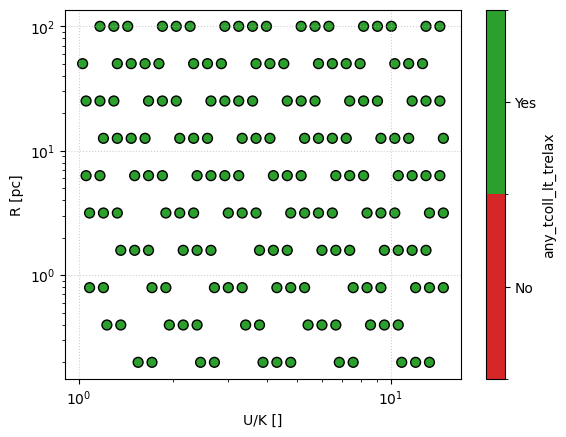

In [40]:
fig, ax = plot_bulk_colored_by_metric(
    table5,               # your timescale table as a DataFrame
    modelbh,
    x_key="U/K", y_key="R",
    x_unit=u.dimensionless_unscaled, y_unit=u.pc,
    metric="any_tcoll_lt_trelax",
)

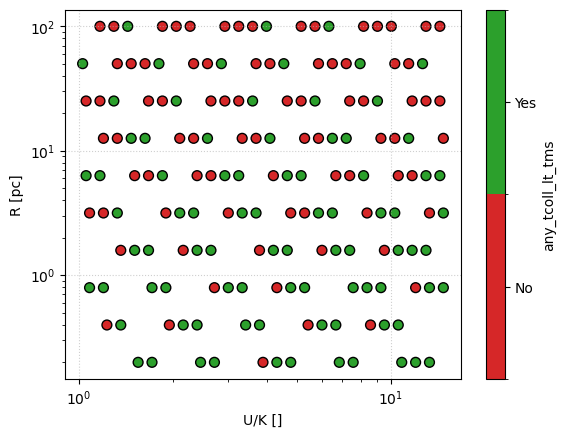

In [41]:
fig, ax = plot_bulk_colored_by_metric(
    table5,               # your timescale table as a DataFrame
    modelbh,
    x_key="U/K", y_key="R",
    x_unit=u.dimensionless_unscaled, y_unit=u.pc,
    metric="any_tcoll_lt_tms",
)

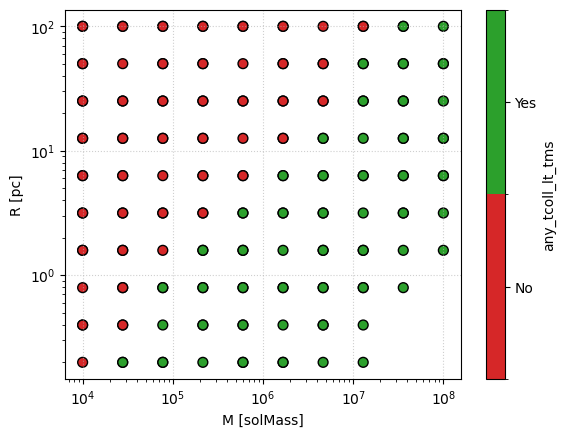

In [42]:
fig, ax = plot_bulk_colored_by_metric(
    table5,               # your timescale table as a DataFrame
    modelbh,
    x_key="M", y_key="R",
    x_unit=u.Msun, y_unit=u.pc,
    metric="any_tcoll_lt_tms",
)